In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

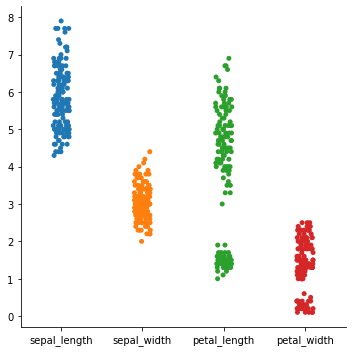

In [2]:
data = sns.load_dataset("iris")
data
data.describe()
sns.catplot(data=data)

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
(dm := data.melt(id_vars="species"))

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


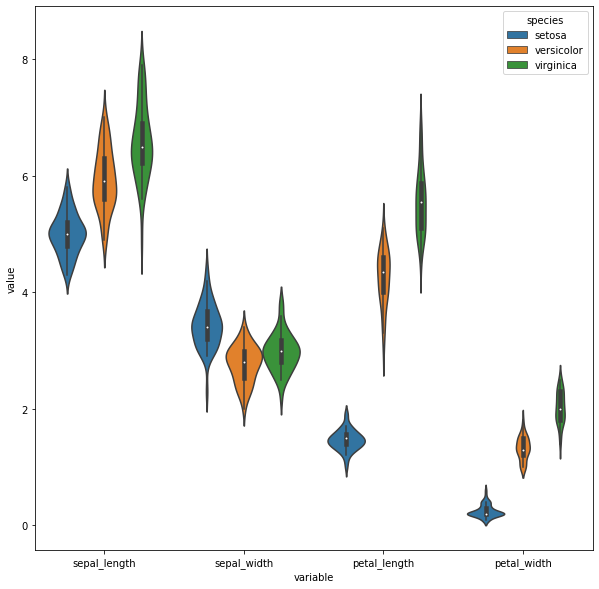

In [5]:
plt.figure(figsize=(10,10))
sns.violinplot(data=dm, x="variable", y="value", hue="species")

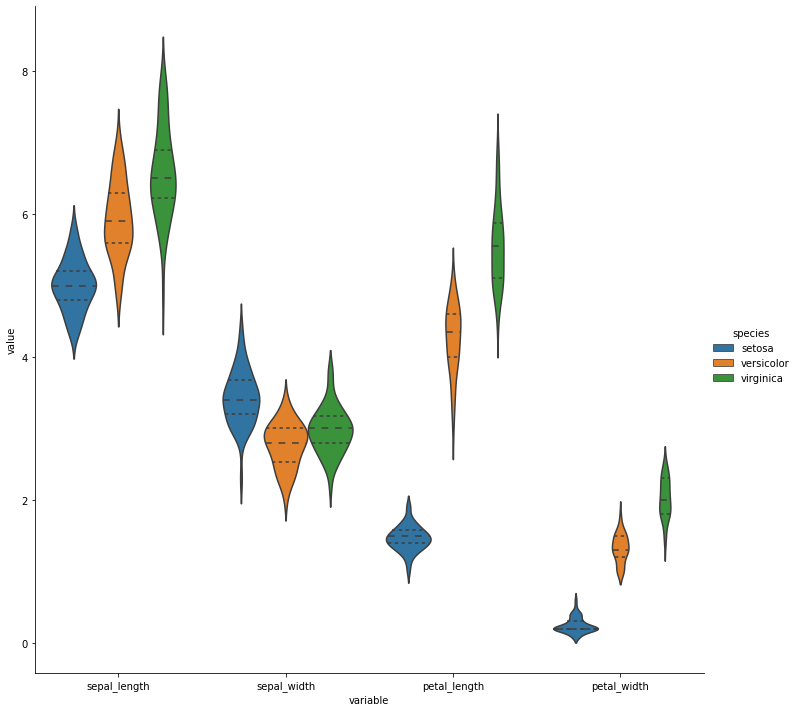

In [6]:
sns.catplot(data=dm, x="variable", y="value", hue="species", kind="violin", inner="quart", height=10)

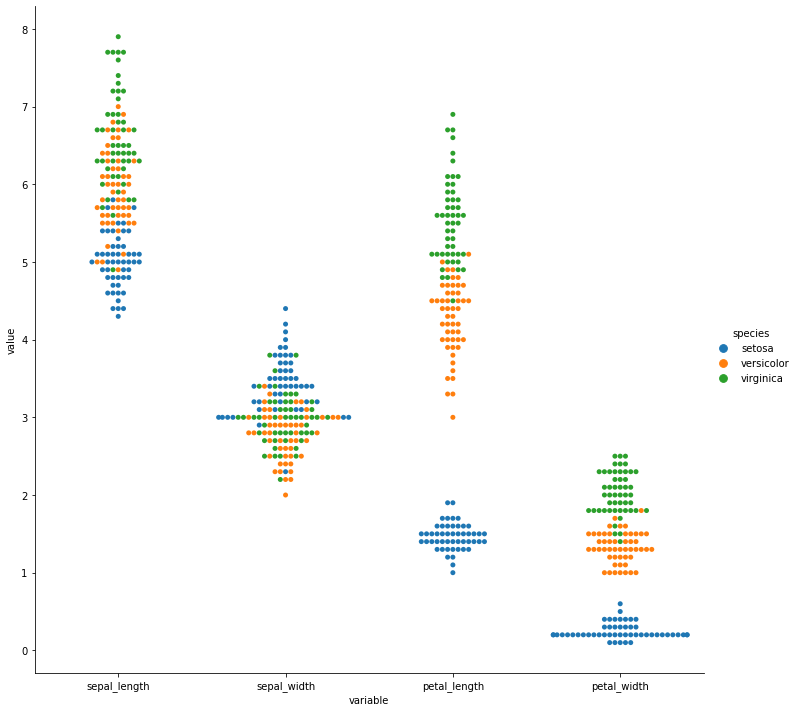

In [7]:
sns.catplot(data=dm, x="variable", y="value", hue="species", kind="swarm", height=10)

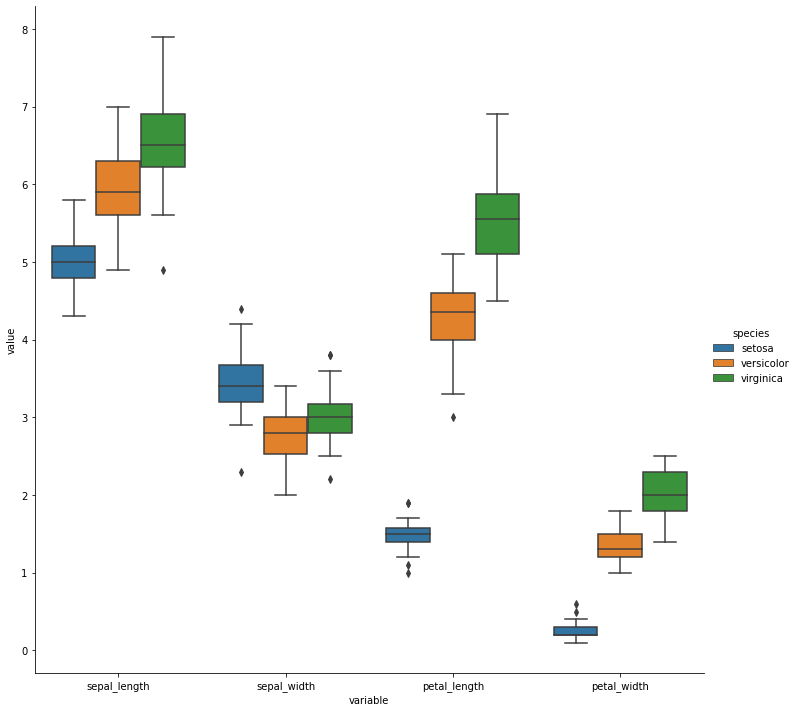

In [8]:
sns.catplot(data=dm, x="variable", y="value", hue="species", kind="box", height=10)

In [9]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


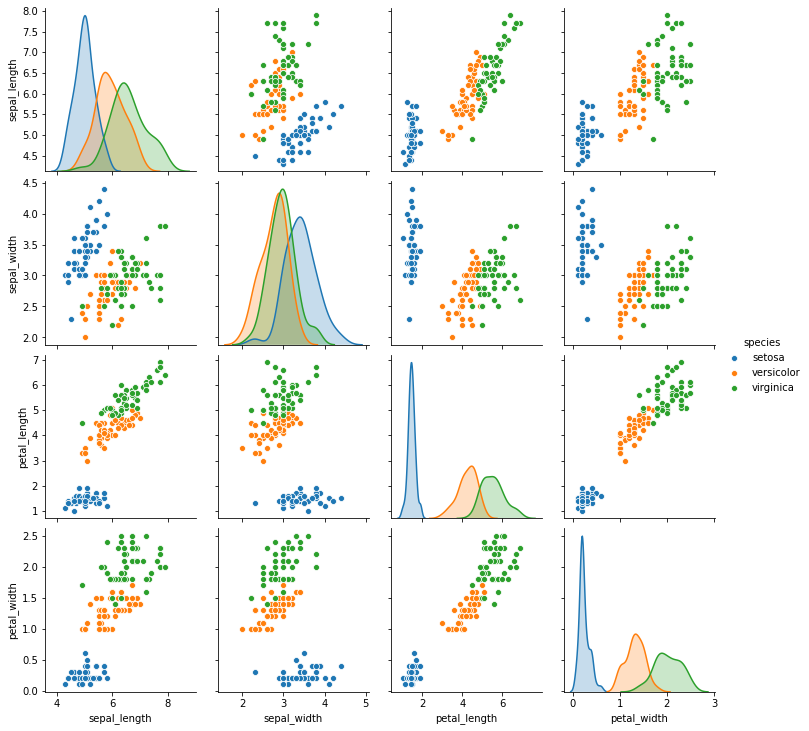

In [15]:
sns.pairplot(data, hue="species")

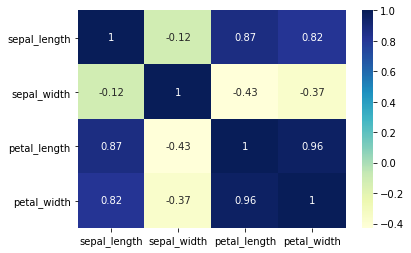

In [19]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)